## Demo for distribution visualization using PP plot and QQ plot

Lets generate observations from exponential distribution with $\lambda=5$ and check if these observations come from exponential distribution with $\lambda=5$.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import statsmodels.api as sm
import pandas as pd

lmbda  = 5
N = 1000

observations = expon.rvs(scale=1/lmbda, size = N)

Lets sort these observations and find emprical cdf values.

For this purpose:
- sort observations
- cdf is computed as $(i-0.5)/N$ (0.5 is subtracted as Yates correction when a continous distribution is used to approximate a discrete distribution - We will talk about this later in the course!)

In [64]:
observations = sorted(observations)
df = pd.DataFrame(observations,columns=["Observations"], index=pd.RangeIndex(start=1, stop=N+1, name='Index'))
# 0.5 is added as indices start with 0
empr_cdf = [(i+0.5)/N for i in range(N)]
df['Empr. cdf']= empr_cdf
display(df)

,Observations,Empr. cdf
Index,,
1,0.000073,0.0005
2,0.000100,0.0015
3,0.000261,0.0025
4,0.000414,0.0035
5,0.000447,0.0045
...,...,...
996,1.069047,0.9955
997,1.095593,0.9965
998,1.120292,0.9975


Now we are going to compare:
- Emprical cdf against theoretical cdf for PP-plot
- Observations against theoretical quantiles for QQ-plot

As the observations are compared against exponential distribution, its theoretical cdf is computed as $F(x)=1-\exp\{-\lambda x\}$

In this example, $\lambda=5$ is used.

In [66]:
# 0.5 is added as indices start with 0
theo_cdf = [1-np.exp(-lmbda* i) for i in observations]
df["Theoretical. cdf"] = theo_cdf
display(df)

,Observations,Empr. cdf,Theoretical. cdf
Index,,,
1,0.000073,0.0005,0.000363
2,0.000100,0.0015,0.000500
3,0.000261,0.0025,0.001302
4,0.000414,0.0035,0.002068
5,0.000447,0.0045,0.002230
...,...,...,...
996,1.069047,0.9955,0.995229
997,1.095593,0.9965,0.995822
998,1.120292,0.9975,0.996308


Quantile values for emprical cdf values are computed using inverse cdf.

For exponential distribution inverse cdf is $F^{-1}(x)=\frac{1}{\lambda}ln(1-x)$

In [67]:
theo_quantile = [-1/lmbda*np.log(1-i) for i in empr_cdf]
df["Theoretical quantile"] = theo_quantile
display(df)

,Observations,Empr. cdf,Theoretical. cdf,Theoretical quantile
Index,,,,
1,0.000073,0.0005,0.000363,0.000100
2,0.000100,0.0015,0.000500,0.000300
3,0.000261,0.0025,0.001302,0.000501
4,0.000414,0.0035,0.002068,0.000701
5,0.000447,0.0045,0.002230,0.000902
...,...,...,...,...
996,1.069047,0.9955,0.995229,1.080736
997,1.095593,0.9965,0.995822,1.130998
998,1.120292,0.9975,0.996308,1.198293


For PP-plot, plot emprical cdf against theoretical cdf

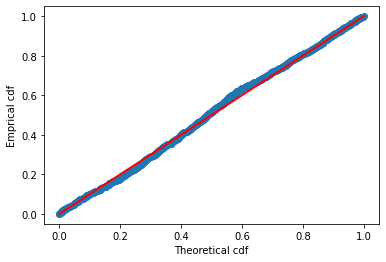

In [68]:
plt.scatter(theo_cdf, empr_cdf)

# draw line
x = np.arange(0,1.1,0.1)
plt.plot(x, x, color='red',linewidth=2)
plt.xlabel('Theoretical cdf')
plt.ylabel('Emprical cdf');

For QQ-plot, plot observations against theoretical quantiles 

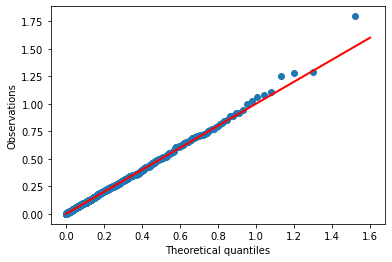

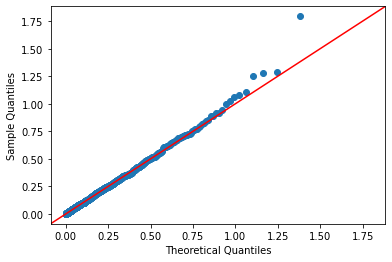

In [58]:
plt.scatter(theo_quantile, observations)

# draw line
x = np.arange(0,1.61,0.1)
plt.plot(x, x, color='red',linewidth=2)
plt.xlabel('Theoretical quantiles')
plt.ylabel('Observations');

# Lets use statmodels library
sm.qqplot(np.array(observations), expon, scale=1/lmbda, line='45');

Lets try the same for observations from uniform distribution.

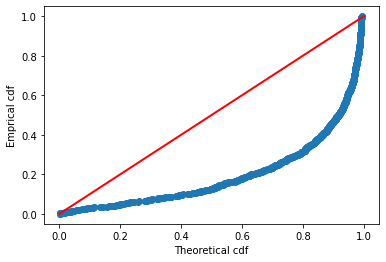

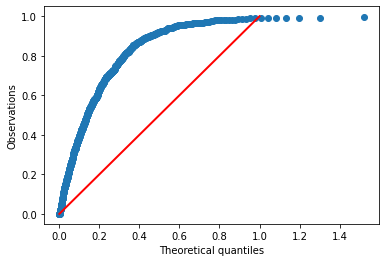

In [59]:
from scipy.stats import uniform 

N = 1000
observations = uniform.rvs(size = N)

observations = sorted(observations)
empr_cdf = [(i+0.5)/N for i in range(N)]
theo_cdf = [1-np.exp(-lmbda* i) for i in observations]
theo_quantile = [-1/lmbda*np.log(1-i) for i in empr_cdf] 

plt.scatter(theo_cdf, empr_cdf)

# draw line
x = np.arange(0,1.1,0.1)
plt.plot(x, x, color='red',linewidth=2)
plt.xlabel('Theoretical cdf')
plt.ylabel('Emprical cdf');

plt.figure()

plt.scatter(theo_quantile, observations)

# draw line
x = np.arange(0,1.1,0.1)
plt.plot(x, x, color='red',linewidth=2)
plt.xlabel('Theoretical quantiles')
plt.ylabel('Observations');


# Lets use statmodels library
# sm.qqplot(np.array(observations), expon, scale=1/lmbda, line='45');
